In [2]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('AirPassengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


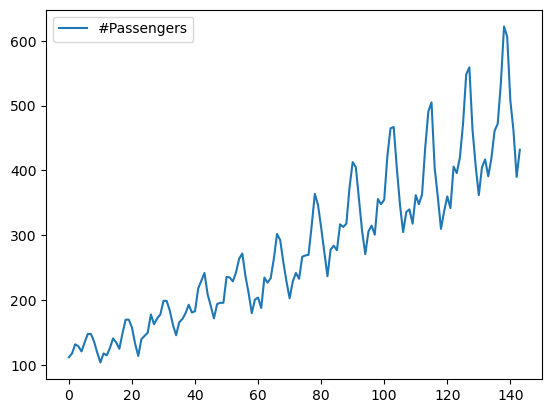

In [6]:
df.plot()

In [7]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [11]:
df['ds'] = pd.to_datetime(df['ds'])

In [12]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [14]:
from fbprophet import Prophet

In [15]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [17]:
# Initialize the model
model = Prophet()

In [18]:
df.columns

Index(['ds', 'y'], dtype='object')

In [20]:
df.columns = ['ds', 'y']

In [21]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [22]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [28]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [23]:
# create future dates of 365 days
future_dates = model.make_future_dataframe(periods = 365)

In [29]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [24]:
prediction = model.predict(future_dates)

In [25]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,56.752298,114.415898,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,46.573090,106.174202,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,79.991037,141.417492,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,79.418709,137.138116,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,82.798985,140.096084,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


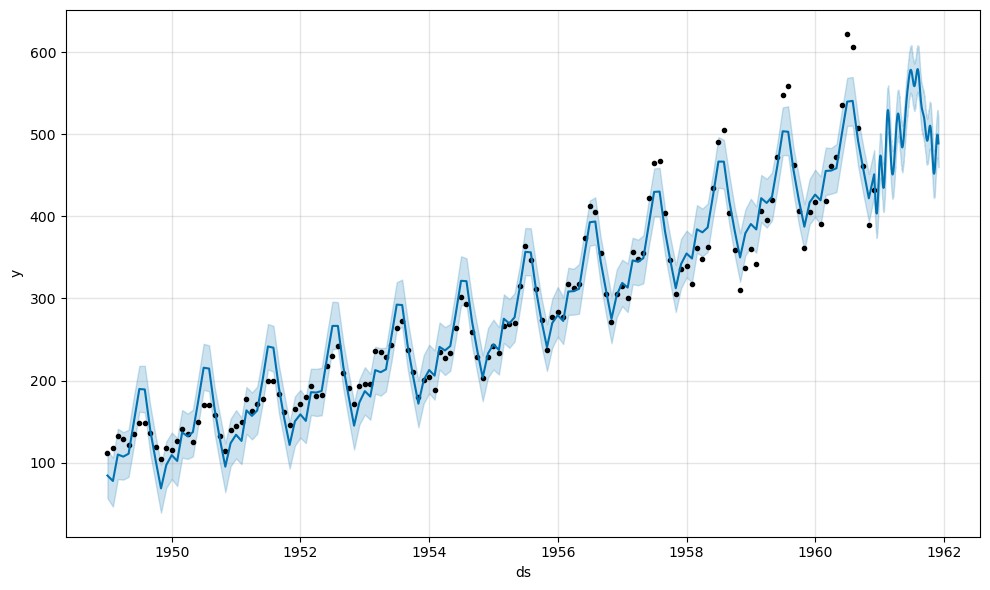

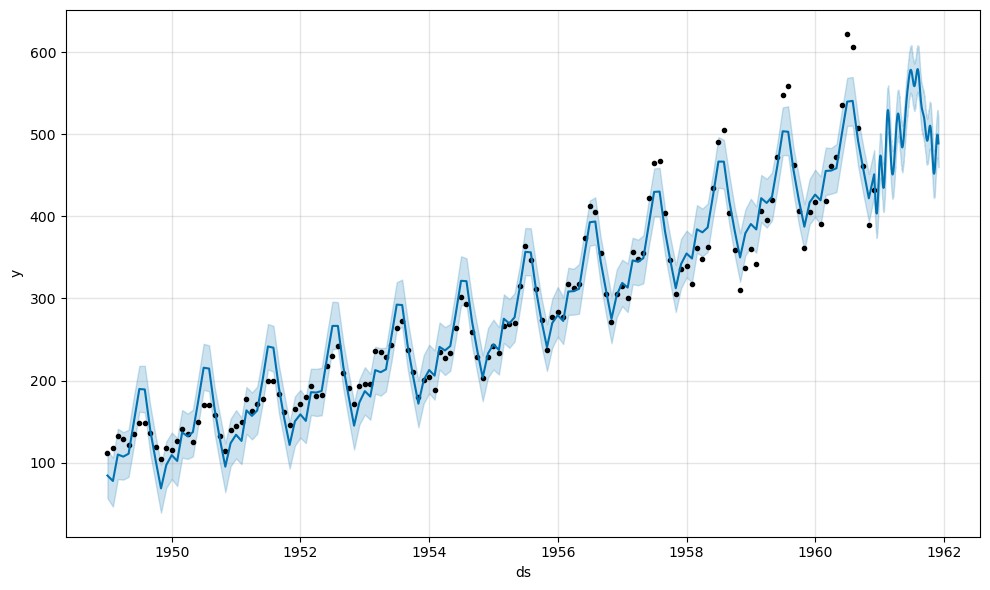

In [30]:
# plot the predicted projection
model.plot(prediction)

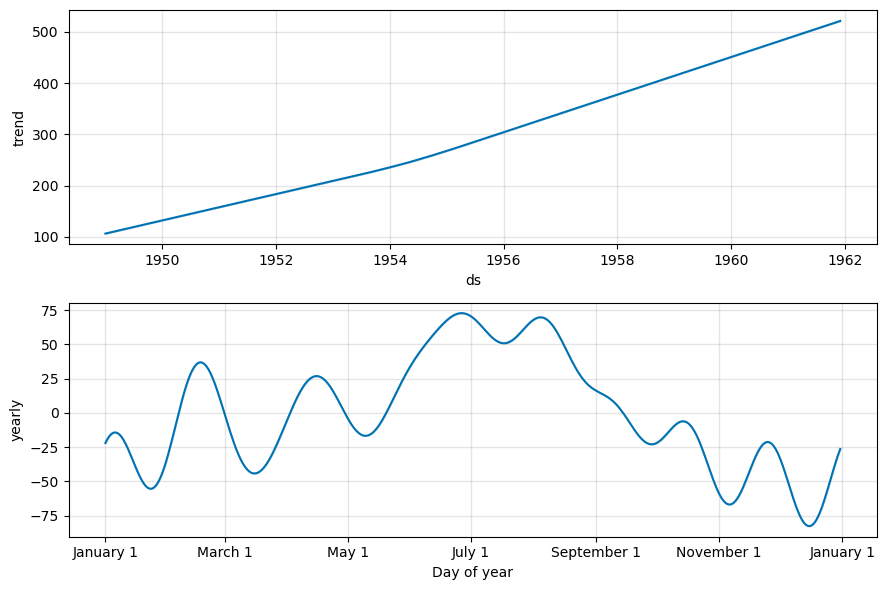

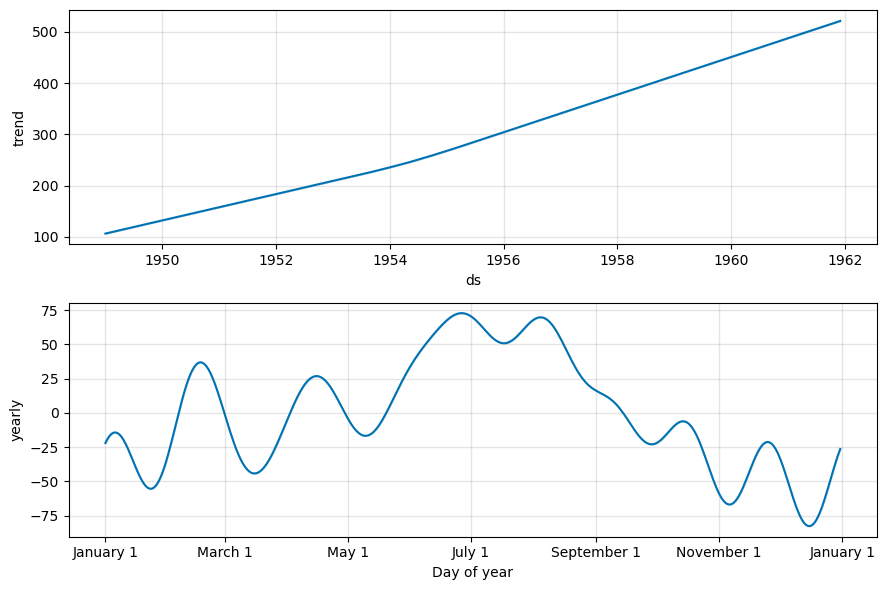

In [31]:
# visualize each component[Trends, yearly]
model.plot_components(prediction)

Time Series Analysis

1960-1962
Cross-validation
1960-61 --- Train dataset
1961-62 --- Test dataset
1962-63 --- Validation

In [34]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '730 days', period = '180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.819730,156.599881,157.071034,150,1951-01-18
1,1951-03-01,169.267028,168.529767,170.119984,178,1951-01-18
2,1951-04-01,156.601332,155.011135,158.397280,163,1951-01-18
3,1951-05-01,142.228261,139.615790,145.049687,172,1951-01-18
4,1951-06-01,177.404761,173.620048,181.358035,178,1951-01-18


In [35]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.227273
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.181818
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.136364
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.136364
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.181818


In [37]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1085.982413,32.954247,25.858707,0.078429,0.073811,0.227273
1,42 days,1013.087718,31.829039,25.298741,0.077251,0.073811,0.181818
2,46 days,910.373154,30.172391,24.801127,0.079580,0.084098,0.136364
3,47 days,1044.626120,32.320676,26.980818,0.082844,0.085696,0.136364
4,48 days,1033.404419,32.146608,26.391799,0.080742,0.085696,0.181818
...,...,...,...,...,...,...,...
165,359 days,760.178959,27.571343,21.529284,0.068171,0.061569,0.340909
166,360 days,763.720751,27.635498,21.814144,0.069046,0.061569,0.318182
167,362 days,855.530925,29.249460,23.057300,0.068087,0.061569,0.318182
168,364 days,829.056511,28.793341,21.986980,0.065168,0.051689,0.318182


C:\Users\pinak\anaconda3\envs\FbForecasting\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\pinak\anaconda3\envs\FbForecasting\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


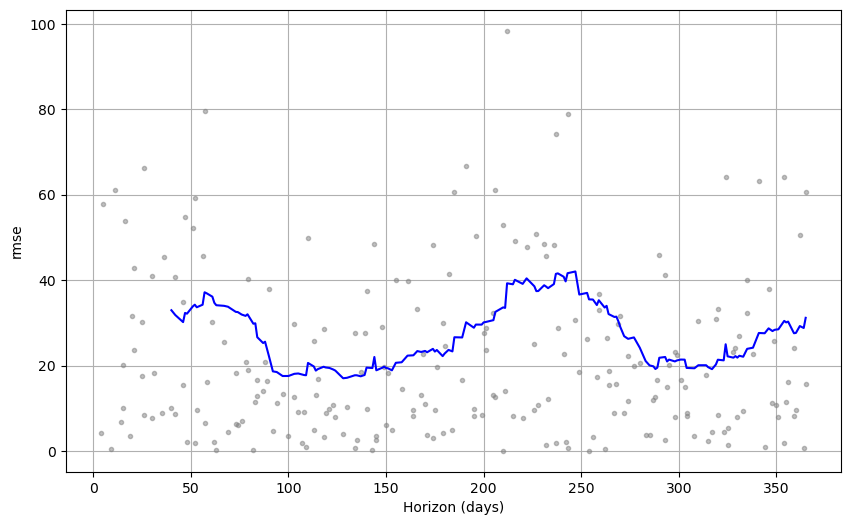

In [36]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')